In [15]:
import cv2 as cv
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame({"images":[], "label":[]})
train_path = '../raw data/asl_dataset/'
folders = glob(train_path+'/*')
noclasses = len(folders)
print(noclasses)

36


In [16]:
for path in folders:
    img_path = glob(path+'/*')
    _,label = os.path.split(path)
    files = os.listdir(path)
    for filename in files:
        im = cv.imread(path+'/'+filename, 64).flatten() # 64 is for IMREAD_REDUCED_GRAYSCALE_8 (grayscale, 1/8th)
#         res = cv.resize(im, dsize=(42, 42)) # resize image
        if (path[-1].isdigit() == False): # do not include numbers
            data = pd.DataFrame({"images":[im], "label":[label]})
            df = df.append(data, ignore_index = True)

In [17]:
X = np.vstack(df['images'])
y = df['label']
print(X.shape)
print(y.shape)

(1815, 2500)
(1815,)


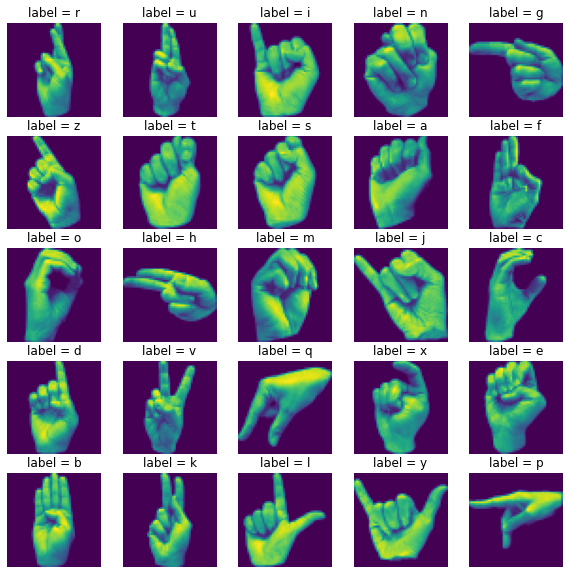

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

gridsize = 5
numfigs = gridsize**2
figsize = (10, 10)
cols = gridsize
rows = gridsize

def trim(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
    
plot, axs = plt.subplots(rows, cols, figsize=figsize)
axs = trim(axs, numfigs)
for ax, fig in zip(axs, range(0, 1815, math.floor(1815/numfigs))):
    sign = X[fig]
    sign_pixels = sign.reshape(50, 50)
    ax.imshow(sign_pixels)
    ax.axis('off')
    ax.set_title('label = %s' % str(y[fig]))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
print("Images training data shape:")
print(X_train.shape)
print("\nLabels training data shape:")
print(y_train.shape)
print("\nImages test data shape:")
print(X_test.shape)
print("\nLabels test data shape:")
print(y_test.shape)

Images training data shape:
(1361, 2500)

Labels training data shape:
(1361,)

Images test data shape:
(454, 2500)

Labels test data shape:
(454,)


In [22]:
from sklearn.linear_model import LogisticRegression
# in my research for this, I found that the default solver (lbfgs) is too slow for this problem.
logisticRegr = LogisticRegression(C=50. / len(X_train), penalty='l1', solver='saga', tol=0.1)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
# show score to confirm success 
score = logisticRegr.score(X_test, y_test)
print(score)

0.9383259911894273


In [23]:
from sklearn.metrics import classification_report
print(
    f"Classification report:\n"
    f"{classification_report(y_test, predictions)}\n"
)

Classification report:
              precision    recall  f1-score   support

           a       0.94      1.00      0.97        17
           b       0.92      1.00      0.96        12
           c       1.00      0.96      0.98        27
           d       1.00      0.93      0.97        15
           e       1.00      1.00      1.00        20
           f       1.00      0.94      0.97        16
           g       0.79      0.94      0.86        16
           h       1.00      0.93      0.97        15
           i       1.00      1.00      1.00        22
           j       0.95      0.95      0.95        20
           k       1.00      0.73      0.85        15
           l       0.90      1.00      0.95        19
           m       0.77      0.83      0.80        12
           n       0.90      0.82      0.86        22
           o       0.94      1.00      0.97        15
           p       1.00      0.88      0.94        17
           q       1.00      1.00      1.00        17
    

In [24]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

Count of misclassified: 28, total test imgs: 454
Percent misclassified: 6.167400881057269%

First 25 misclassifications:


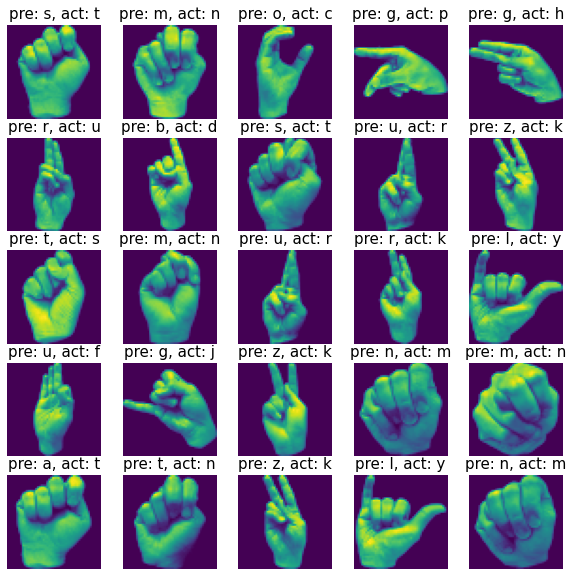

In [25]:
missedCount = len(misclassifiedIndexes)
print('Count of misclassified: {}, total test imgs: {}'.format(missedCount, len(predictions)))
print('Percent misclassified: {}%'.format(missedCount / len(predictions) * 100))
print('\nFirst 25 misclassifications:')

test_img = np.array(X_test)
test_lbl = np.array(y_test)
    
plot, axs = plt.subplots(rows, cols, figsize=figsize)
axs = trim(axs, numfigs)
for ax, badindex in zip(axs, misclassifiedIndexes[0:25]):
    digit = test_img[badindex]
    digit_pixels = digit.reshape(50, 50)
    ax.imshow(digit_pixels)
    ax.axis('off')
    ax.set_title('pre: {}, act: {}'.format(predictions[badindex], test_lbl[badindex]), fontsize = 15)